The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

You need to identify the best possible model that will give the required performance

### Objective

Explore and visualize the dataset.
Build a classification model to predict if the customer is going to churn or not
Optimize the model using appropriate techniques
Generate a set of insights and recommendations that will help the bank
Data Dictionary:

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
* Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
* Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
* Avg_Utilization_Ratio: Represents how much of the available credit the customer spent

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores and split data
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To impute missing values
from sklearn.impute import KNNImputer

# To build a logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To suppress the warnings
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

<IPython.core.display.Javascript object>

### Loading Data

In [2]:
bank = pd.read_csv("BankChurners.csv")

<IPython.core.display.Javascript object>

In [3]:
bank.shape

(10127, 21)

<IPython.core.display.Javascript object>

In [4]:
df = bank.copy()

<IPython.core.display.Javascript object>

In [5]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


<IPython.core.display.Javascript object>

In [6]:
df.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


<IPython.core.display.Javascript object>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

<IPython.core.display.Javascript object>

Observation: Education_Level & Marital_Status have null values 

In [8]:
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [9]:
round(df.isnull().sum() / df.isnull().count() * 100, 2)

CLIENTNUM                    0.0
Attrition_Flag               0.0
Customer_Age                 0.0
Gender                       0.0
Dependent_count              0.0
Education_Level             15.0
Marital_Status               7.4
Income_Category              0.0
Card_Category                0.0
Months_on_book               0.0
Total_Relationship_Count     0.0
Months_Inactive_12_mon       0.0
Contacts_Count_12_mon        0.0
Credit_Limit                 0.0
Total_Revolving_Bal          0.0
Avg_Open_To_Buy              0.0
Total_Amt_Chng_Q4_Q1         0.0
Total_Trans_Amt              0.0
Total_Trans_Ct               0.0
Total_Ct_Chng_Q4_Q1          0.0
Avg_Utilization_Ratio        0.0
dtype: float64

<IPython.core.display.Javascript object>

Observation: Education_Level has 15% of null values , 
Marital_Status is 7.4% of null values

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.0,7.391776e+08,3.690378e+07,708082083.0,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
Customer_Age,10127.0,4.632596e+01,8.016814e+00,26.0,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
Dependent_count,10127.0,2.346203e+00,1.298908e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,10127.0,3.592841e+01,7.986416e+00,13.0,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,10127.0,3.812580e+00,1.554408e+00,1.0,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,10127.0,2.341167e+00,1.010622e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,10127.0,2.455317e+00,1.106225e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,10127.0,8.631954e+03,9.088777e+03,1438.3,2.555000e+03,4.549000e+03,1.106750e+04,3.451600e+04
Total_Revolving_Bal,10127.0,1.162814e+03,8.149873e+02,0.0,3.590000e+02,1.276000e+03,1.784000e+03,2.517000e+03
Avg_Open_To_Buy,10127.0,7.469140e+03,9.090685e+03,3.0,1.324500e+03,3.474000e+03,9.859000e+03,3.451600e+04


<IPython.core.display.Javascript object>

In [11]:
# view the statistical summary of the non-numerical columns in the data
df.describe(exclude=np.number).T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


<IPython.core.display.Javascript object>

In [12]:
cat_col = df.columns

# printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(df[column].value_counts())
    print("-" * 50)

709920258    1
717171408    1
709372608    1
796336833    1
721433283    1
            ..
720250158    1
709831983    1
720917808    1
719207733    1
708085458    1
Name: CLIENTNUM, Length: 10127, dtype: int64
--------------------------------------------------
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
--------------------------------------------------
44    500
49    495
46    490
45    486
47    479
43    473
48    472
50    452
42    426
51    398
53    387
41    379
52    376
40    361
39    333
54    307
38    303
55    279
56    262
37    260
57    223
36    221
35    184
58    157
59    157
34    146
33    127
60    127
32    106
65    101
61     93
62     93
31     91
26     78
30     70
63     65
29     56
64     43
27     32
28     29
67      4
68      2
66      2
70      1
73      1
Name: Customer_Age, dtype: int64
--------------------------------------------------
F    5358
M    4769
Name: Gender, dtype: int64
--------------------

<IPython.core.display.Javascript object>

## Data Pre-Processing

In [13]:
df.drop(["CLIENTNUM"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

## EDA

### Univariate analysis

In [14]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

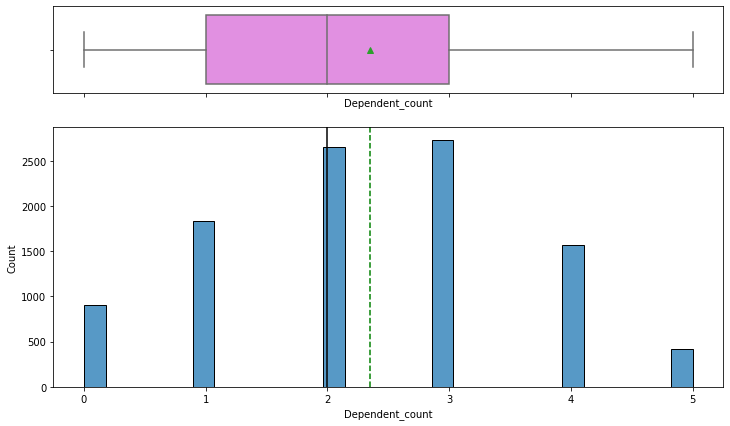

<IPython.core.display.Javascript object>

In [15]:
histogram_boxplot(df, "Dependent_count")

Dependent_Count is evenly distributed

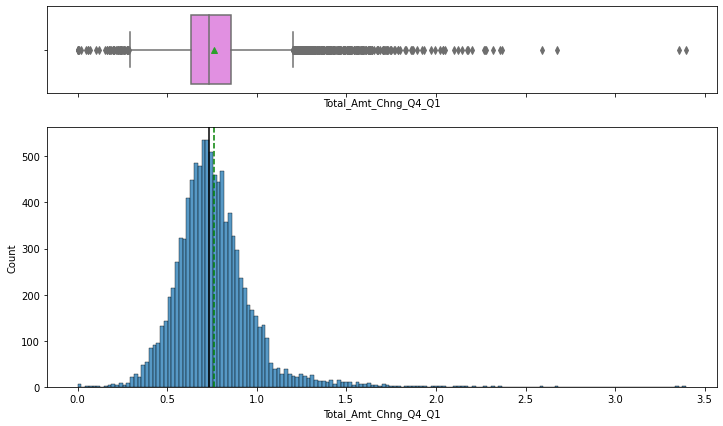

<IPython.core.display.Javascript object>

In [16]:
histogram_boxplot(df, "Total_Amt_Chng_Q4_Q1")

Total_Amt_Chng_Q4_Q1 is right skewed

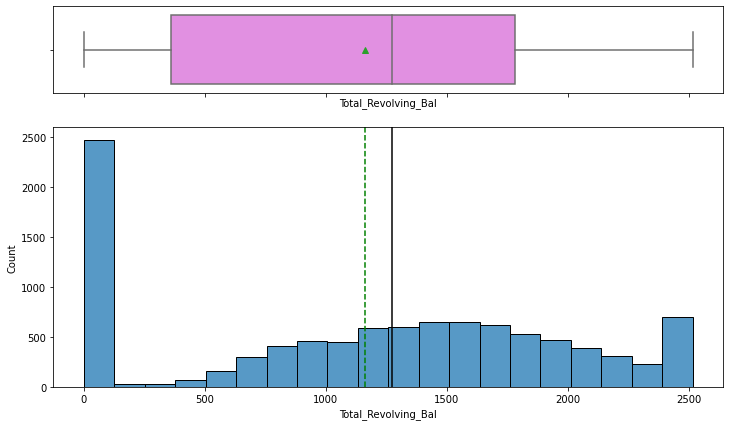

<IPython.core.display.Javascript object>

In [17]:
histogram_boxplot(df, "Total_Revolving_Bal")

Total_Revolving_Bal is evenly distributed

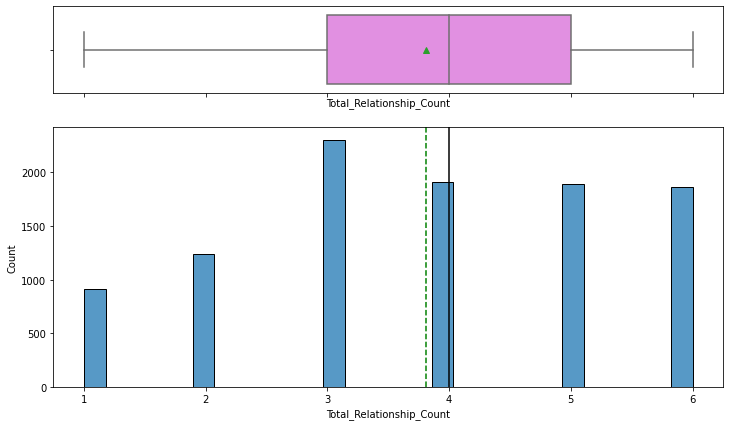

<IPython.core.display.Javascript object>

In [18]:
histogram_boxplot(df, "Total_Relationship_Count")

Total_Revolving_Bal is evenly distributed

In [19]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

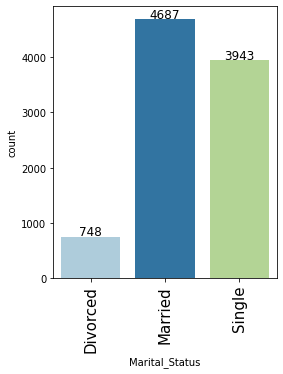

<IPython.core.display.Javascript object>

In [20]:
labeled_barplot(df, "Marital_Status")

Majority of the customers are married

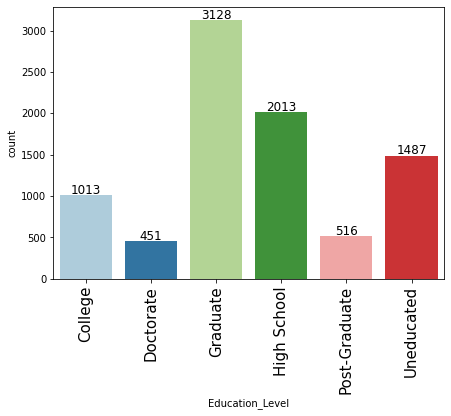

<IPython.core.display.Javascript object>

In [21]:
labeled_barplot(df, "Education_Level")

36% of customers are Graduates

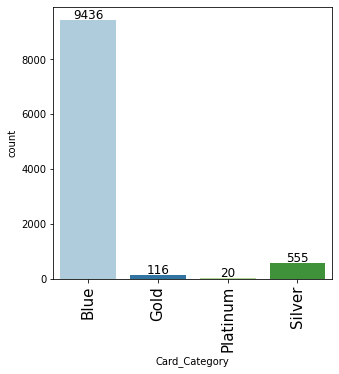

<IPython.core.display.Javascript object>

In [22]:
labeled_barplot(df, "Card_Category")

95% of customers are blue category card holders

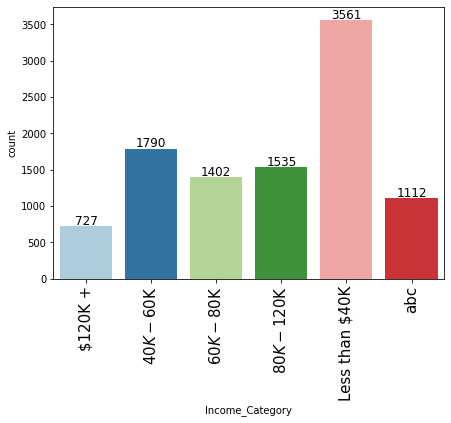

<IPython.core.display.Javascript object>

In [23]:
labeled_barplot(df, "Income_Category")

35% of customers earn less than $40k

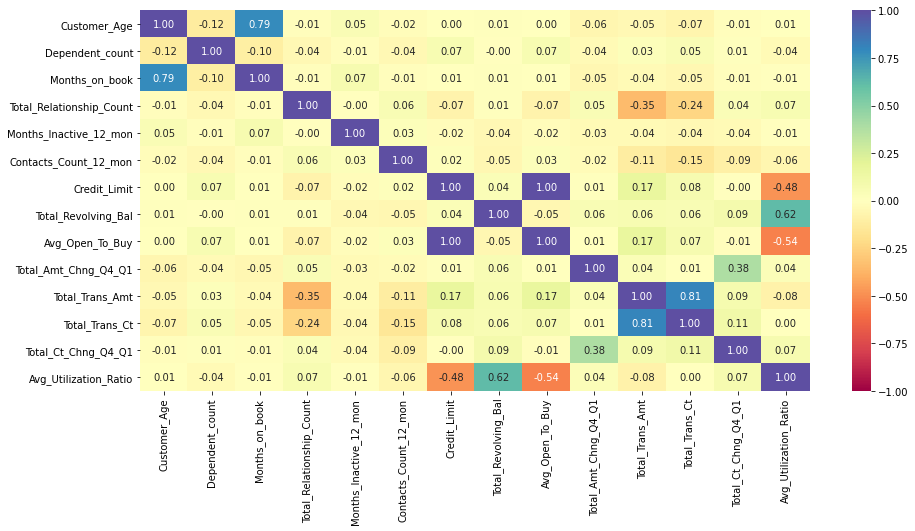

<IPython.core.display.Javascript object>

In [24]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* There is high correlation between "Avg_Open_to_bug" & "Credit_Limit" so we can drop one of them 
* There is high coorelation between Total_Trans_Ct" & "Total_Trans_Amount" so we can drop one.
* There is high coorelation between Months_on_book" & "Customer_Age" so we can drop one.

In [25]:
# Dropping  columns
df.drop(
    columns=[
        "Months_on_book",
        "Avg_Open_To_Buy",
        "Total_Trans_Ct",
    ],
    inplace=True,
)

<IPython.core.display.Javascript object>

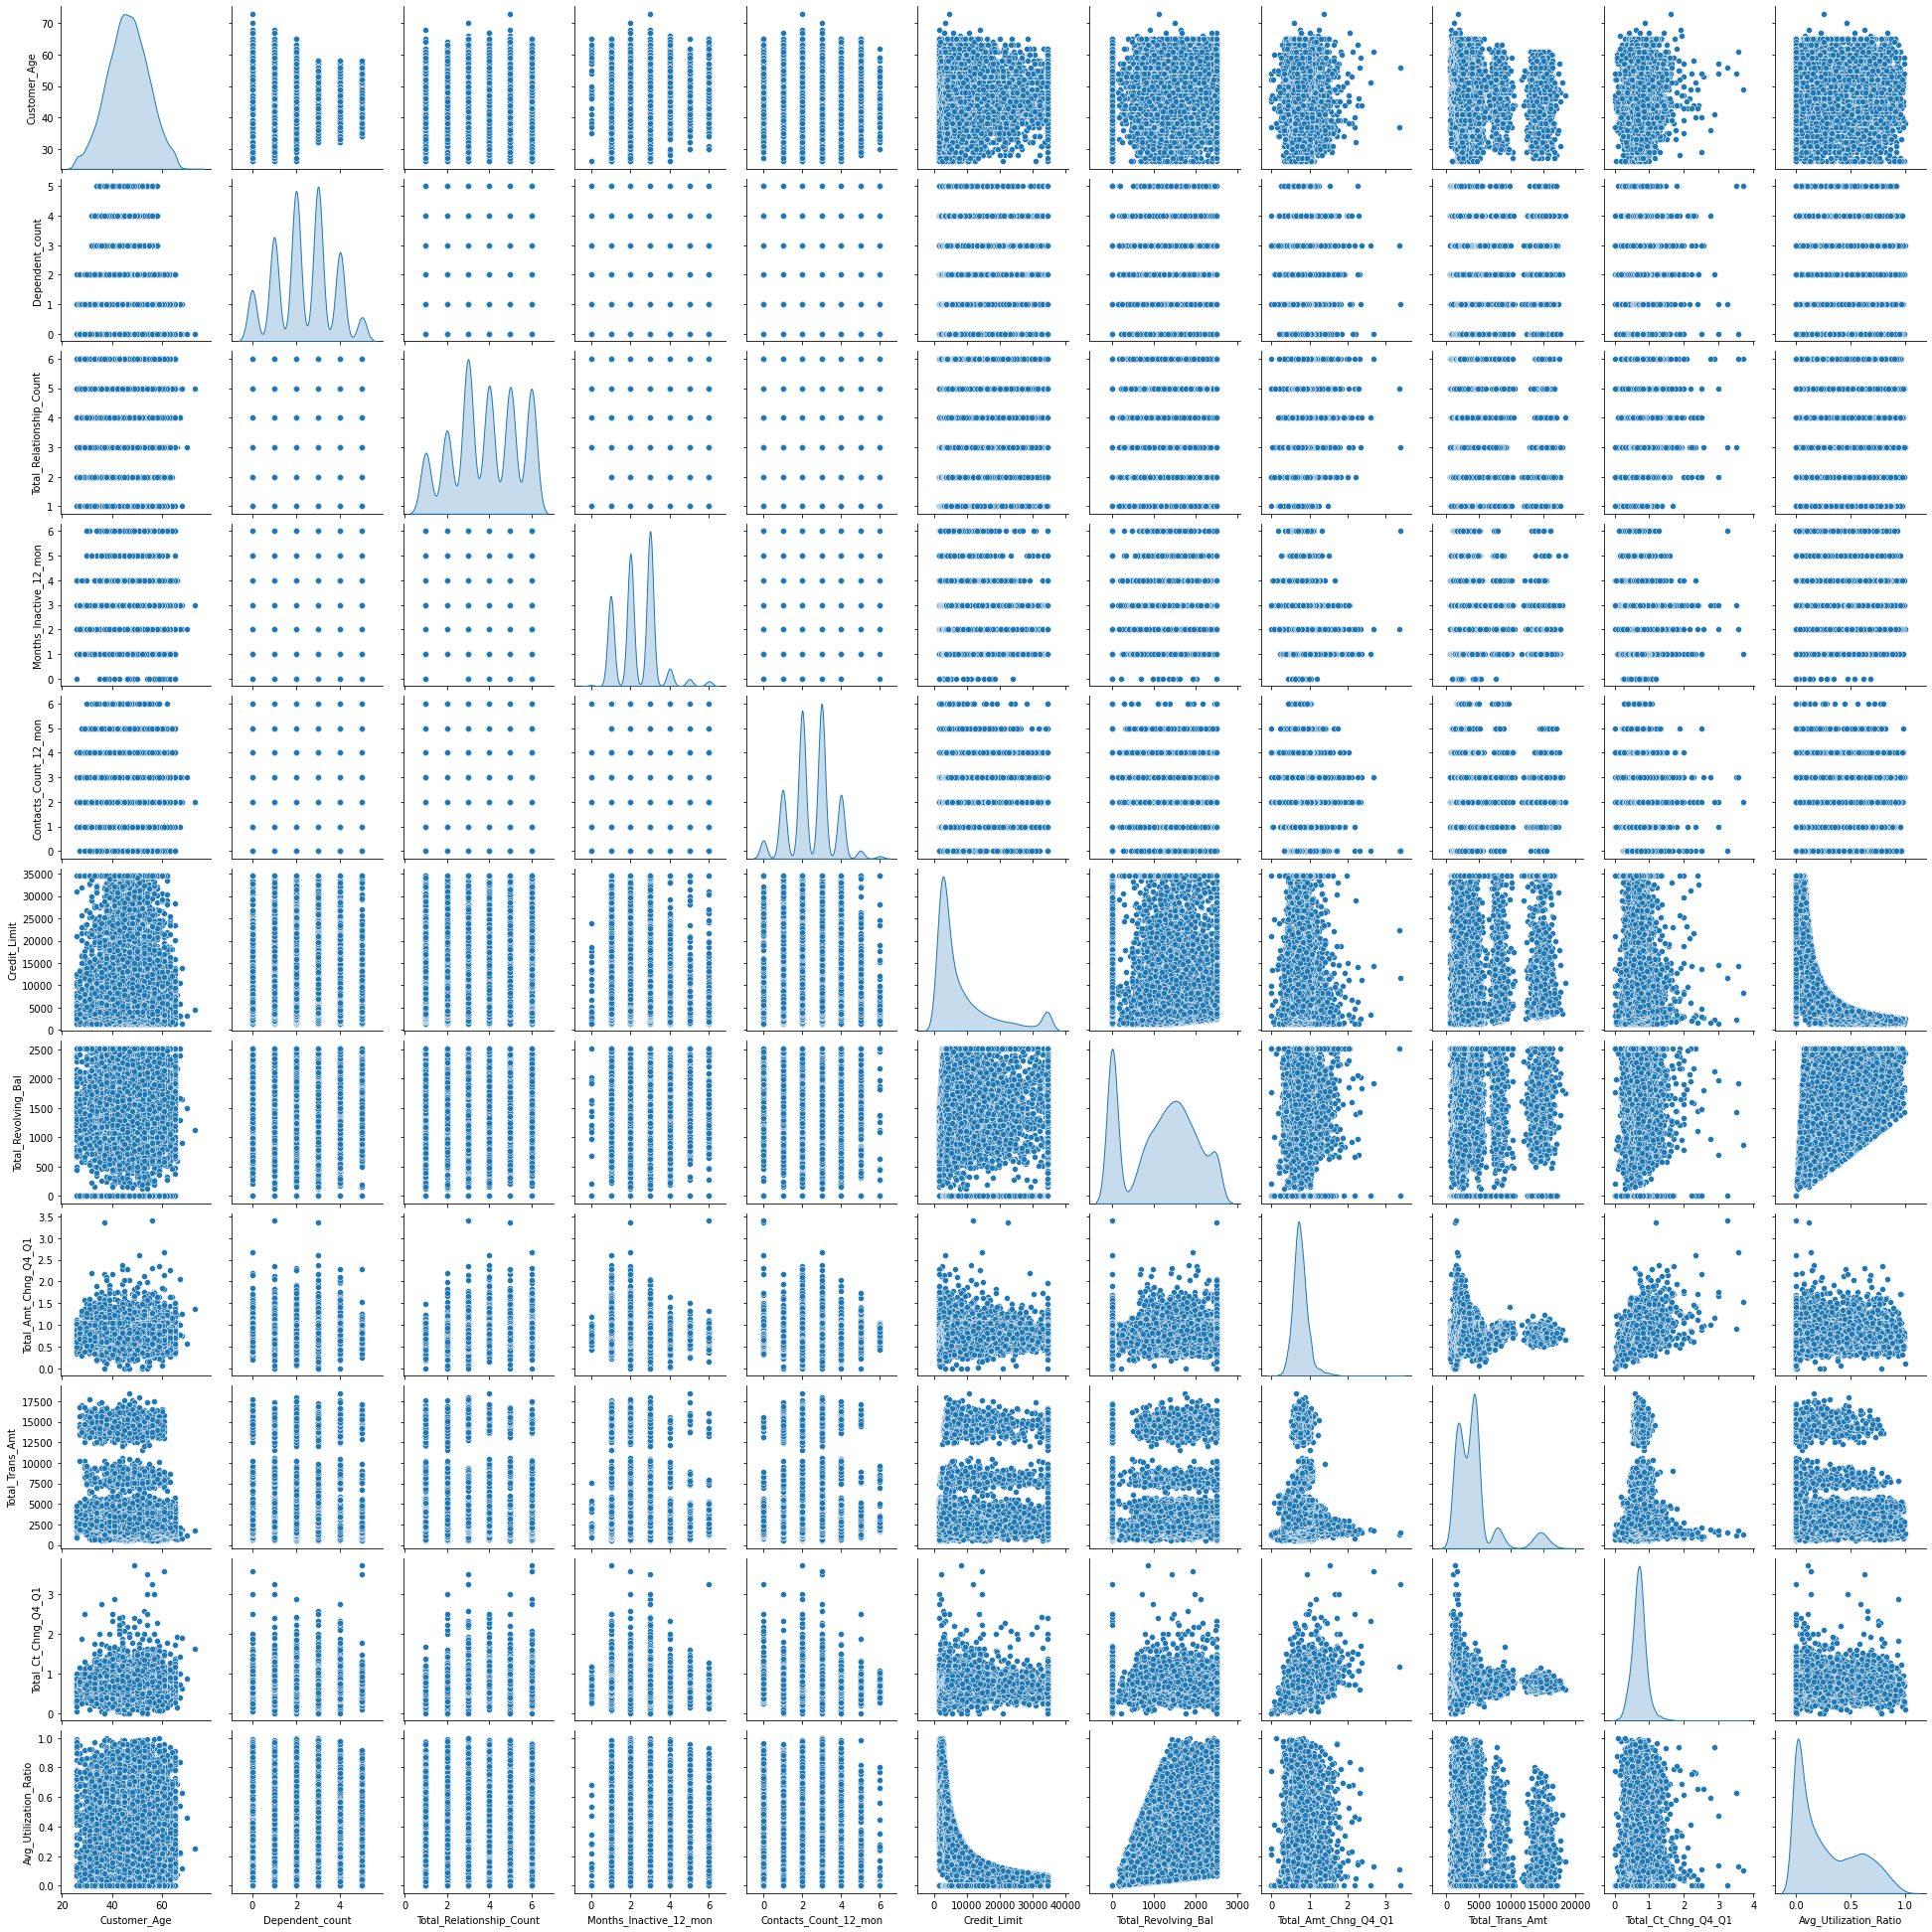

<IPython.core.display.Javascript object>

In [26]:
sns.pairplot(data=df, diag_kind="kde")
plt.show()

In [27]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

Dependent_count    0     1     2     3     4    5    All
Income_Category                                         
All              904  1838  2655  2732  1574  424  10127
Less than $40K   389   693   900   896   535  148   3561
$40K - $60K      174   341   455   474   271   75   1790
$60K - $80K      109   225   376   398   220   74   1402
$80K - $120K      81   255   404   473   266   56   1535
abc              122   208   278   290   174   40   1112
$120K +           29   116   242   201   108   31    727
------------------------------------------------------------------------------------------------------------------------


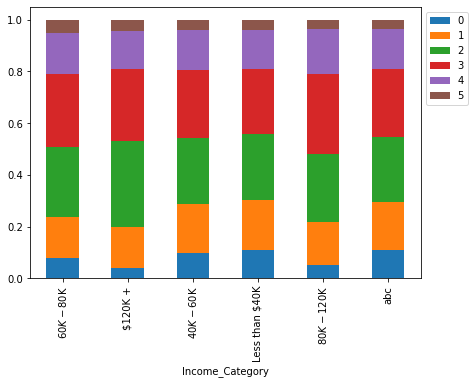

<IPython.core.display.Javascript object>

In [28]:
stacked_barplot(df, "Income_Category", "Dependent_count")

Marital_Status   Divorced  Married  Single   All
Income_Category                                 
All                   748     4687    3943  9378
Less than $40K        254     1628    1429  3311
$40K - $60K           138      816     704  1658
$60K - $80K           108      661     531  1300
$80K - $120K          103      735     561  1399
abc                    93      493     444  1030
$120K +                52      354     274   680
------------------------------------------------------------------------------------------------------------------------


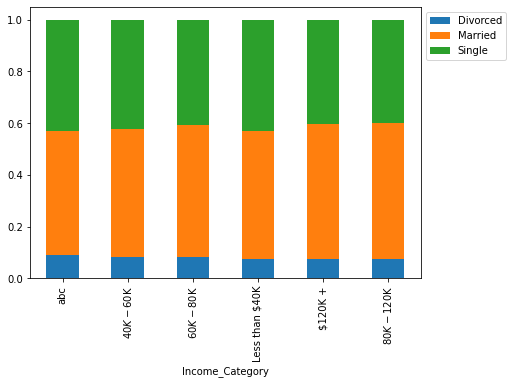

<IPython.core.display.Javascript object>

In [29]:
stacked_barplot(df, "Income_Category", "Marital_Status")

In [30]:
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

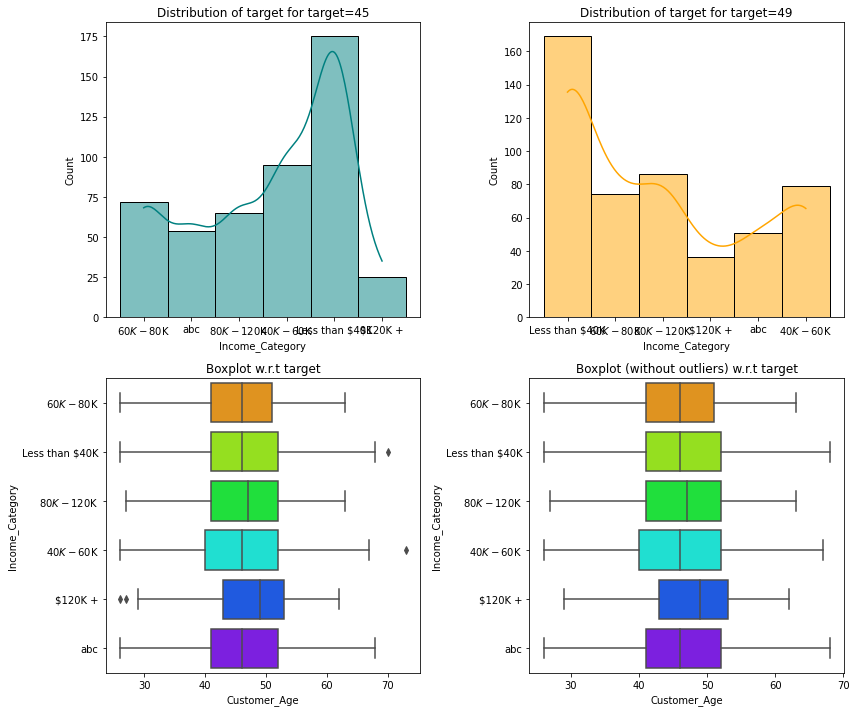

<IPython.core.display.Javascript object>

In [31]:
distribution_plot_wrt_target(df, "Income_Category", "Customer_Age")

In [32]:
df["Attrition_Flag"].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

<IPython.core.display.Javascript object>

In [33]:
df["Marital_Status"].value_counts()

Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64

<IPython.core.display.Javascript object>

In [34]:
df["Income_Category"].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64

<IPython.core.display.Javascript object>

Observation: Income_category has valuve "abc" that need to be convertted to null 

In [35]:
df["Income_Category"].describe()

count              10127
unique                 6
top       Less than $40K
freq                3561
Name: Income_Category, dtype: object

<IPython.core.display.Javascript object>

In [36]:
df["Income_Category"].replace("abc", np.NaN, inplace=True)

<IPython.core.display.Javascript object>

In [37]:
df["Income_Category"].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
$120K +            727
Name: Income_Category, dtype: int64

<IPython.core.display.Javascript object>

In [38]:
df["Card_Category"].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

<IPython.core.display.Javascript object>

In [39]:
df["Education_Level"].value_counts()

Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

<IPython.core.display.Javascript object>

In [40]:
df["Gender"].value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

<IPython.core.display.Javascript object>

In [41]:
df.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

<IPython.core.display.Javascript object>

In [42]:
imputer = KNNImputer(n_neighbors=5)

<IPython.core.display.Javascript object>

In [43]:
reqd_col_for_impute = [
    "Education_Level",
    "Marital_Status",
    "Income_Category",
]

<IPython.core.display.Javascript object>

In [44]:
df[reqd_col_for_impute].head()

,Education_Level,Marital_Status,Income_Category
0,High School,Married,$60K - $80K
1,Graduate,Single,Less than $40K
2,Graduate,Married,$80K - $120K
3,High School,NaN,Less than $40K
4,Uneducated,Married,$60K - $80K


<IPython.core.display.Javascript object>

In [45]:
data1 = df.copy()

<IPython.core.display.Javascript object>

In [46]:
gender = {"M": 0, "F": 1}
data1["Gender"] = data1["Gender"].map(gender)


education_level = {
    "Graduate": 0,
    "High School": 1,
    "Uneducated": 2,
    "College": 3,
    "Post-Graduate": 4,
    "Doctorate": 5,
}
data1["Education_Level"] = data1["Education_Level"].map(education_level)

income_category = {
    "Less than $40K": 0,
    "$40K - $60K": 1,
    "$80K - $120K": 2,
    "$60K - $80K": 3,
    "$120K +": 4,
}
data1["Income_Category"] = data1["Income_Category"].map(income_category)

marital_status = {
    "Married": 0,
    "Single": 1,
    "Divorced": 2,
}
data1["Marital_Status"] = data1["Marital_Status"].map(marital_status)

card_category = {
    "Blue": 0,
    "Silver": 1,
    "Gold": 2,
    "Platinum": 3,
}
data1["Card_Category"] = data1["Card_Category"].map(card_category)



<IPython.core.display.Javascript object>

In [47]:
data1.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,0,3,1.0,0.0,3.0,0,5,1,3,12691.0,777,1.335,1144,1.625,0.061
1,Existing Customer,49,1,5,0.0,1.0,0.0,0,6,1,2,8256.0,864,1.541,1291,3.714,0.105
2,Existing Customer,51,0,3,0.0,0.0,2.0,0,4,1,0,3418.0,0,2.594,1887,2.333,0.000
3,Existing Customer,40,1,4,1.0,NaN,0.0,0,3,4,1,3313.0,2517,1.405,1171,2.333,0.760
4,Existing Customer,40,0,3,2.0,0.0,3.0,0,5,1,0,4716.0,0,2.175,816,2.500,0.000


<IPython.core.display.Javascript object>

In [48]:
data1.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

<IPython.core.display.Javascript object>

### Data Preparation for Modeling

In [49]:
X = data1.drop(["Attrition_Flag"], axis=1)
y = data1["Attrition_Flag"].apply(lambda x: 1 if x == "Existing Customer" else 0)

<IPython.core.display.Javascript object>

In [50]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 16) (2026, 16) (2026, 16)


<IPython.core.display.Javascript object>

In [51]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 6075
Number of rows in validation data = 2026
Number of rows in test data = 2026


<IPython.core.display.Javascript object>

### Imputing Missing Values

In [52]:
# Fit and transform the train data
X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])

# Transform the train data
X_val[reqd_col_for_impute] = imputer.fit_transform(X_val[reqd_col_for_impute])

# Transform the test data
X_test[reqd_col_for_impute] = imputer.transform(X_test[reqd_col_for_impute])

<IPython.core.display.Javascript object>

In [53]:
# Checking that no column has missing values in train, validation or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio     

<IPython.core.display.Javascript object>

In [54]:
## Function to inverse the encoding
def inverse_mapping(x, y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype("category")
    X_val[y] = np.round(X_val[y]).map(inv_dict).astype("category")
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype("category")

<IPython.core.display.Javascript object>

In [55]:
inverse_mapping(gender, "Gender")
inverse_mapping(education_level, "Education_Level")
inverse_mapping(income_category, "Income_Category")
inverse_mapping(marital_status, "Marital_Status")
inverse_mapping(card_category, "Card_Category")

<IPython.core.display.Javascript object>

In [56]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

F    3205
M    2870
Name: Gender, dtype: int64
******************************
Graduate         1896
High School      1706
Uneducated       1196
College           703
Post-Graduate     299
Doctorate         275
Name: Education_Level, dtype: int64
******************************
Married     2979
Single      2647
Divorced     449
Name: Marital_Status, dtype: int64
******************************
Less than $40K    2156
$40K - $60K       1396
$80K - $120K      1240
$60K - $80K        847
$120K +            436
Name: Income_Category, dtype: int64
******************************
Blue        5668
Silver       327
Gold          71
Platinum       9
Name: Card_Category, dtype: int64
******************************


<IPython.core.display.Javascript object>

In [57]:
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

F    1106
M     920
Name: Gender, dtype: int64
******************************
Graduate         686
High School      502
Uneducated       410
College          231
Post-Graduate    108
Doctorate         89
Name: Education_Level, dtype: int64
******************************
Married     952
Single      919
Divorced    155
Name: Marital_Status, dtype: int64
******************************
Less than $40K    757
$40K - $60K       457
$80K - $120K      372
$60K - $80K       300
$120K +           140
Name: Income_Category, dtype: int64
******************************
Blue        1893
Silver       108
Gold          19
Platinum       6
Name: Card_Category, dtype: int64
******************************


<IPython.core.display.Javascript object>

In [58]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_test[i].value_counts())
    print("*" * 30)

F    1047
M     979
Name: Gender, dtype: int64
******************************
Graduate         694
High School      505
Uneducated       418
College          213
Post-Graduate    109
Doctorate         87
Name: Education_Level, dtype: int64
******************************
Married     1008
Single       874
Divorced     144
Name: Marital_Status, dtype: int64
******************************
Less than $40K    762
$40K - $60K       459
$80K - $120K      360
$60K - $80K       294
$120K +           151
Name: Income_Category, dtype: int64
******************************
Blue        1875
Silver       120
Gold          26
Platinum       5
Name: Card_Category, dtype: int64
******************************


<IPython.core.display.Javascript object>

### Creating Dummy Variables

In [59]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 26) (2026, 26) (2026, 26)


<IPython.core.display.Javascript object>

### Building a Model

### Model evaluation criterion:

#### Model can make wrong predictions as:
1. Predicting an customer keeps his credit card but in reality, the customer does not keep it  - Loss of resources
2. Predicting an customer does not keep his credit card  but the customer keeps it   - Loss of opportunity

#### Which case is more important? 
* Predicting an customer does not keep his credit card  but the customer keeps  i.e. losing on a potential customer as the customer will not be targeted by the Sales team when they should be targeted.

#### How to reduce this loss i.e need to reduce False Negatives?
* Company would want Recall to be maximized, greater the Recall lesser the chances of false negatives.

In [60]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [61]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

We will train 6 models - Bagging Classifier , Random Forest, Gradient Boosting Classifier, AdaBoost, Logisitic Regression, Decision Tree 

In [62]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("LogisticRegression", LogisticRegression(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Training Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train)) * 100
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Bagging: 96.8427716523312
Random forest: 98.50964998364411
GBM: 98.60768919933037
Adaboost: 97.31312898073851
LogisticRegression: 97.82310608247225
dtree: 95.5287190440455

Training Performance:

Bagging: 99.84310649146892
Random forest: 100.0
GBM: 98.88213375171603
Adaboost: 97.70543243773288
LogisticRegression: 97.76426750343205
dtree: 100.0


<IPython.core.display.Javascript object>

#### Observation :
Gradient Boost Classifier seems to do the best from the cross validation performance. Random Forest is second. While Adaboost and Logistic regression are closed third. 

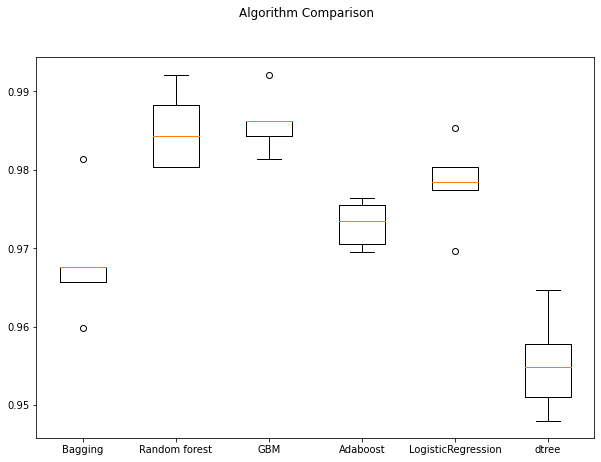

<IPython.core.display.Javascript object>

In [63]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

### Oversampling train data using SMOTE

In [64]:
print(
    "Before UpSampling, counts of label 'Existing Customer': {}".format(
        sum(y_train == 1)
    )
)
print(
    "Before UpSampling, counts of label 'Attrited Customer': {} \n".format(
        sum(y_train == 0)
    )
)

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print(
    "After UpSampling, counts of label 'Existing Customer': {}".format(
        sum(y_train_over == 1)
    )
)
print(
    "After UpSampling, counts of label 'Attrited Customer': {} \n".format(
        sum(y_train_over == 0)
    )
)


print("After UpSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After UpSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before UpSampling, counts of label 'Existing Customer': 5099
Before UpSampling, counts of label 'Attrited Customer': 976 

After UpSampling, counts of label 'Existing Customer': 5099
After UpSampling, counts of label 'Attrited Customer': 5099 

After UpSampling, the shape of train_X: (10198, 26)
After UpSampling, the shape of train_y: (10198,) 



<IPython.core.display.Javascript object>

In [65]:
models_us = []  # Empty list to store all the models

# Appending models into the list
models_us.append(("Bagging_UpSampling", BaggingClassifier(random_state=1)))
models_us.append(("Random forest_UpSampling", RandomForestClassifier(random_state=1)))
models_us.append(("GBM_UpSampling", GradientBoostingClassifier(random_state=1)))
models_us.append(("Adaboost_UpSampling", AdaBoostClassifier(random_state=1)))
models_us.append(("LogisticRegression_UpSampling", LogisticRegression(random_state=1)))
models_us.append(("dtree_UpSampling", DecisionTreeClassifier(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models_us:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Training Performance:" "\n")

for name, model in models_us:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train)) * 100
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Bagging_UpSampling: 96.8427716523312
Random forest_UpSampling: 98.50964998364411
GBM_UpSampling: 98.60768919933037
Adaboost_UpSampling: 97.31312898073851
LogisticRegression_UpSampling: 97.82310608247225
dtree_UpSampling: 95.5287190440455

Training Performance:

Bagging_UpSampling: 99.84310649146892
Random forest_UpSampling: 100.0
GBM_UpSampling: 98.88213375171603
Adaboost_UpSampling: 97.70543243773288
LogisticRegression_UpSampling: 97.76426750343205
dtree_UpSampling: 100.0


<IPython.core.display.Javascript object>

#### Observation :
Gradient Boost Classifier seems to do the best from the cross validation performance for Upsampling data. Random Forest is second. While Adaboost and Logistic regression are closed third. 

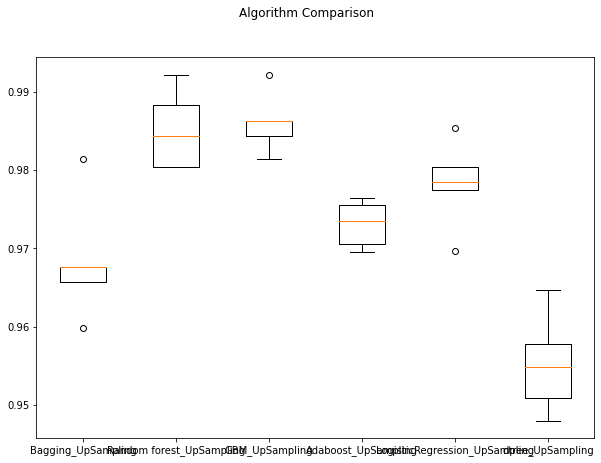

<IPython.core.display.Javascript object>

In [66]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

### Undersampling train data using Random Under Sampler

In [67]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

<IPython.core.display.Javascript object>

In [68]:
print(
    "Before Under Sampling, counts of label 'Existing Customer': {}".format(
        sum(y_train == 1)
    )
)
print(
    "Before Under Sampling, counts of label 'Attrited Customer': {} \n".format(
        sum(y_train == 0)
    )
)

print(
    "After Under Sampling, counts of label 'Existing Customer': {}".format(
        sum(y_train_un == 1)
    )
)
print(
    "After Under Sampling, counts of label 'Attrited Customer': {} \n".format(
        sum(y_train_un == 0)
    )
)

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Existing Customer': 5099
Before Under Sampling, counts of label 'Attrited Customer': 976 

After Under Sampling, counts of label 'Existing Customer': 976
After Under Sampling, counts of label 'Attrited Customer': 976 

After Under Sampling, the shape of train_X: (1952, 26)
After Under Sampling, the shape of train_y: (1952,) 



<IPython.core.display.Javascript object>

In [69]:
models_ds = []  # Empty list to store all the models

# Appending models into the list
models_ds.append(("Bagging_downSampling", BaggingClassifier(random_state=1)))
models_ds.append(("Random forest_downSampling", RandomForestClassifier(random_state=1)))
models_ds.append(("GBM_downSampling", GradientBoostingClassifier(random_state=1)))
models_ds.append(("Adaboost_downSampling", AdaBoostClassifier(random_state=1)))
models_ds.append(
    ("LogisticRegression_downSampling", LogisticRegression(random_state=1))
)
models_ds.append(("dtree_downSampling", DecisionTreeClassifier(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models_ds:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Training Performance:" "\n")

for name, model in models_ds:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train)) * 100
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Bagging_downSampling: 96.8427716523312
Random forest_downSampling: 98.50964998364411
GBM_downSampling: 98.60768919933037
Adaboost_downSampling: 97.31312898073851
LogisticRegression_downSampling: 97.82310608247225
dtree_downSampling: 95.5287190440455

Training Performance:

Bagging_downSampling: 99.84310649146892
Random forest_downSampling: 100.0
GBM_downSampling: 98.88213375171603
Adaboost_downSampling: 97.70543243773288
LogisticRegression_downSampling: 97.76426750343205
dtree_downSampling: 100.0


<IPython.core.display.Javascript object>

#### Observation :
Gradient Boost Classifier seems to do the best from the cross validation performance for Downsampling data. Random Forest is second. While Adaboost and Logistic regression are closed third. 

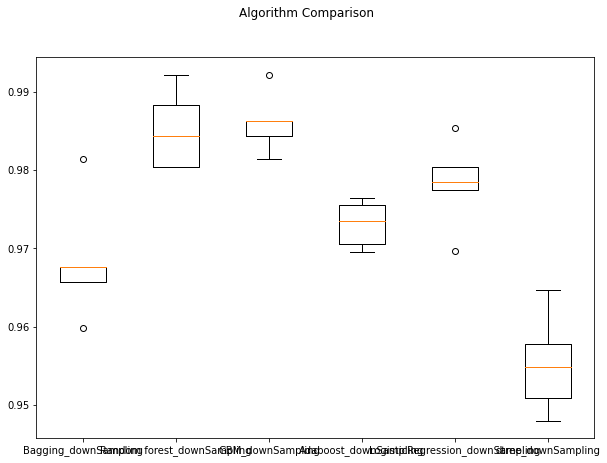

<IPython.core.display.Javascript object>

In [70]:
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

## Hyperparameter Tuning

We will tune 3 models - Gradient Boost Classifier, Random Forest and AdaBoost.

In [71]:
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [72]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

## Adaboost

In [73]:
%%time 

# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV

param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 80, 'learning_rate': 0.01, 'base_estimator': DecisionTreeClassifier(max_depth=1, random_state=1)} with CV score=1.0:
Wall time: 25.1 s


<IPython.core.display.Javascript object>

In [74]:
# building model with best parameters
adb_tuned2 = AdaBoostClassifier(
    n_estimators=80,
    learning_rate=0.01,
    random_state=1,
    base_estimator=DecisionTreeClassifier(max_depth=1, random_state=1),
)

# Fit the model on training data
adb_tuned2.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=1),
                   learning_rate=0.01, n_estimators=80, random_state=1)

<IPython.core.display.Javascript object>

In [75]:
# Calculating different metrics on train set
Adaboost_random_train = model_performance_classification_sklearn(
    adb_tuned2, X_train, y_train
)
print("Training performance:")
Adaboost_random_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.839342,1.0,0.839342,0.912654


<IPython.core.display.Javascript object>

In [76]:
# Calculating different metrics on validation set
Adaboost_random_val = model_performance_classification_sklearn(adb_tuned2, X_val, y_val)
print("Validation performance:")
Adaboost_random_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.839092,1.0,0.839092,0.912507


<IPython.core.display.Javascript object>

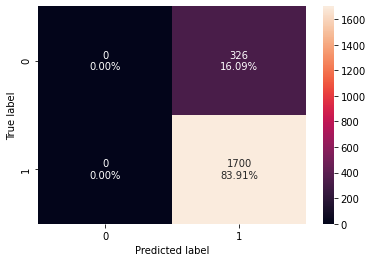

<IPython.core.display.Javascript object>

In [77]:
# creating confusion matrix
confusion_matrix_sklearn(adb_tuned2, X_val, y_val)

### Gradient Boosting Classifier

In [78]:
%%time 

# defining model
gbc_tuned = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 1, 'n_estimators': 100, 'max_features': 1} with CV score=0.9866643575977987:
Wall time: 35.6 s


<IPython.core.display.Javascript object>

In [79]:
# building model with best parameters
gbc_tuned = GradientBoostingClassifier(
    n_estimators=150,
    max_features=1,
    subsample=0.8,
)

# Fit the model on training data
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(max_features=1, n_estimators=150, subsample=0.8)

<IPython.core.display.Javascript object>

In [80]:
# Calculating different metrics on train set
gbc_random_train = model_performance_classification_sklearn(gbc_tuned, X_train, y_train)
print("Training performance:")
gbc_random_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.931687,0.989606,0.933062,0.960503


<IPython.core.display.Javascript object>

In [82]:
# Calculating different metrics on validation set
gbc_random_val = model_performance_classification_sklearn(gbc_tuned, X_val, y_val)
print("Validation performance:")
gbc_random_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.91461,0.99,0.915171,0.951116


<IPython.core.display.Javascript object>

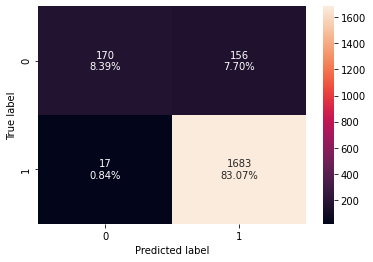

<IPython.core.display.Javascript object>

In [84]:
confusion_matrix_sklearn(gbc_tuned, X_val, y_val)

### Random Forest Classifier

In [85]:
%%time 

# defining model
rf_tuned = RandomForestClassifier(random_state=1,oob_score=True,bootstrap=True)

parameters = {  
                'max_depth': list(np.arange(5,30,5)) + [None],
                'max_features': ['sqrt','log2',None],
                'min_samples_leaf': np.arange(1,15,5),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(10,110,10)}



# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(rf_tuned, parameters, scoring=scorer, cv=5,n_jobs=-1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))


Best parameters are {'n_estimators': 20, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 5} with CV score=0.9872524004695107:
Wall time: 6.2 s


<IPython.core.display.Javascript object>

In [87]:
# building model with best parameters
rf_tuned = RandomForestClassifier(
    n_estimators=20,
    min_samples_split=7,
    min_samples_leaf=1,
    max_features="sqrt",
    max_depth=5,
)

# Fit the model on training data
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_split=7,
                       n_estimators=20)

<IPython.core.display.Javascript object>

In [88]:
# Calculating different metrics on train set
rf_random_train = model_performance_classification_sklearn(rf_tuned, X_train, y_train)
print("Training performance:")
rf_random_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.919012,0.985683,0.923049,0.953338


<IPython.core.display.Javascript object>

In [89]:
# Calculating different metrics on validation set
rf_random_val = model_performance_classification_sklearn(rf_tuned, X_val, y_val)
print("Validation performance:")
rf_random_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.907206,0.982353,0.913567,0.946712


<IPython.core.display.Javascript object>

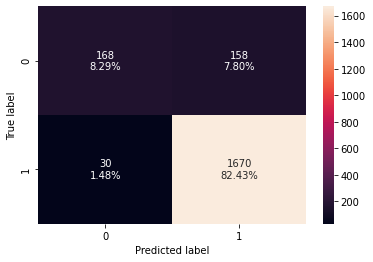

<IPython.core.display.Javascript object>

In [90]:
confusion_matrix_sklearn(rf_tuned, X_val, y_val)

## Comparing all models

In [92]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        rf_random_train.T,
        gbc_random_train.T,
        Adaboost_random_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Random Forest",
    "Gradient Boost Classifier",
    "AdaBoost",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Random Forest,Gradient Boost Classifier,AdaBoost
Accuracy,0.919012,0.931687,0.839342
Recall,0.985683,0.989606,1.000000
Precision,0.923049,0.933062,0.839342
F1,0.953338,0.960503,0.912654


<IPython.core.display.Javascript object>

In [93]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [
        rf_random_val.T,
        gbc_random_val.T,
        Adaboost_random_val.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Random Forest",
    "Gradient Boost Classifier",
    "AdaBoost",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Random Forest,Gradient Boost Classifier,AdaBoost
Accuracy,0.907206,0.914610,0.839092
Recall,0.982353,0.990000,1.000000
Precision,0.913567,0.915171,0.839092
F1,0.946712,0.951116,0.912507


<IPython.core.display.Javascript object>

In [94]:
# Calculating different metrics on the test set
adb_tuned2_test = model_performance_classification_sklearn(adb_tuned2, X_test, y_test)
print("Test performance:")
adb_tuned2_test

Test performance:


,Accuracy,Recall,Precision,F1
0,0.839585,1.0,0.839585,0.912798


<IPython.core.display.Javascript object>

In [97]:
gbc_tuned_test = model_performance_classification_sklearn(gbc_tuned, X_test, y_test)
print("Test performance:")
gbc_tuned_test

Test performance:


,Accuracy,Recall,Precision,F1
0,0.918065,0.992945,0.916441,0.95316


<IPython.core.display.Javascript object>

In [98]:
rf_tuned_test = model_performance_classification_sklearn(rf_tuned, X_test, y_test)
print("Test performance:")
rf_tuned_test

Test performance:


,Accuracy,Recall,Precision,F1
0,0.900296,0.98883,0.901877,0.943354


<IPython.core.display.Javascript object>

### Observation : It looks like Gradient Boost Classifier is the clear winner . We will use to Productize the model

## Pipelines for productionizing the model


In [99]:
# creating a list of numerical variables
numerical_features = [
    "Customer_Age",
    "Dependent_count",
    "Total_Relationship_Count",
    "Months_Inactive_12_mon",
    "Contacts_Count_12_mon",
    "Credit_Limit",
    "Total_Revolving_Bal",
    "Total_Trans_Amt",
    "Total_Ct_Chng_Q4_Q1",
    "Total_Amt_Chng_Q4_Q1",
    "Avg_Utilization_Ratio",
]

# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", KNNImputer(n_neighbors=5))])


# creating a list of categorical variables
categorical_features = ["Gender", "Education_Level", "Marital_Status", "Income_Category", "Card_Category"]

# creating a transformer for categorical variables, which will first apply simple imputer and 
#then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("imputer", KNNImputer(n_neighbors=5)),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)
# handle_unknown = "ignore", allows model to handle any unknown category in the test data

# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="passthrough",
)
# remainder = "passthrough" has been used, it will allow variables that are present in original data 
# but not in "numerical_columns" and "categorical_columns" to pass through the column transformer without any changes


<IPython.core.display.Javascript object>

In [100]:
# Separating target variable and other variables
X = data1.drop(columns="Attrition_Flag")
Y = data1["Attrition_Flag"]

<IPython.core.display.Javascript object>

In [101]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(7088, 16) (3039, 16)


<IPython.core.display.Javascript object>

In [102]:
# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "Gradient Boost Classifier",
            GradientBoostingClassifier(
                n_estimators=150,
                max_features=1,
                subsample=0.8,
            ),
        ),
    ]
)
# Fit the model on training data
model.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer())]),
                                                  ['Customer_Age',
                                                   'Dependent_count',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Credit_Limit',
                                                   'Total_Revolving_Bal',
                                                   'Total_Trans_Amt',
                                                   'Total_Ct_Chng_Q4_Q1',
                                           

<IPython.core.display.Javascript object>

##  Recommendations

- The important aspects to look out for are Customer Age , no. of Dependents , How long has the customer been inactive and Credit limit.
- Company should target customers that are older in age
- Company should target customer who have  dependents
- Our analysis showed that most customers are married
